<a href="https://colab.research.google.com/github/marongkang/MLHelloWorld/blob/main/%E6%89%8B%E5%86%99%E6%95%B0%E5%AD%97%E5%88%86%E7%B1%BB%EF%BC%88cnn%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.autograd import Variable

In [3]:
batch_size=1024
lr=0.01
num_epoch=2

In [4]:
trans=transforms.ToTensor()
train_loader=data.DataLoader(
    torchvision.datasets.MNIST(
    root="../data", train=True, transform=trans, download=True),
    batch_size=batch_size, 
    shuffle=True
)
test_loader=data.DataLoader(
    torchvision.datasets.MNIST(
    root="../data", train=False, transform=trans, download=True),
    batch_size=batch_size, 
    shuffle=True
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [5]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            
            ax.imshow(img[0].numpy())
        else:
            # PIL图片
            ax.imshow(img[0])
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)    
        ax.set_title(titles[i].item())
    return axes

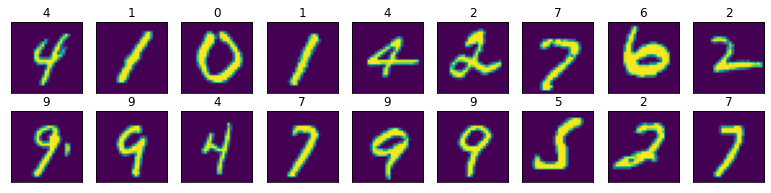

In [6]:
X, y = next(iter(train_loader))
show_images(X, 2, 9, titles=y);

In [7]:
X.shape

torch.Size([1024, 1, 28, 28])

In [8]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [9]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [10]:
def get_accuracy(y_pred,y_target):
  n_correct=torch.eq(y_pred,y_target).sum().item()
  accuracy=n_correct/len(y_pred)
  return accuracy

In [11]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [ ]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=lr)

#loss_fun
loss_func = nn.CrossEntropyLoss()

losses=[]
train_accs=[]
test_accs=[]
#training loop
for epoch in range(num_epoch):
  for i, (x, y) in enumerate(train_loader):
    batch_x = Variable(x)
    batch_y = Variable(y)
    #输入训练数据
    output = cnn(batch_x)
    _,pred=output.max(dim=1)
    #计算误差
    loss = loss_func(output, batch_y)
    #计算准确度
    acc=get_accuracy(pred,batch_y)
    losses.append(loss.item())
    train_accs.append(acc)
    print("loss:",loss.item(),"train_acc",acc)
    #清空上一次梯度
    optimizer.zero_grad()
    #误差反向传递
    loss.backward()
    #优化器参数更新
    optimizer.step()
  for i, (x, y) in enumerate(test_loader):
    batch_x = Variable(x)
    batch_y = Variable(y)
    output = cnn(batch_x)
    _,pred=output.max(dim=1)
    acc=get_accuracy(pred,batch_y)
    print("test_acc:",acc)
    test_accs.append(acc)

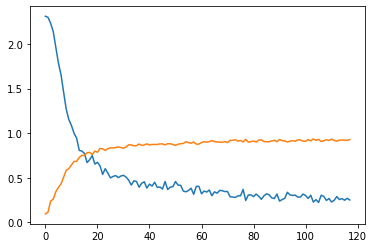

In [13]:
plt.plot(range(len(losses)),losses,label="loss")
plt.plot(range(len(train_accs)),train_accs,label="train_acc")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efb8a2facd0>,
      dtype=object)

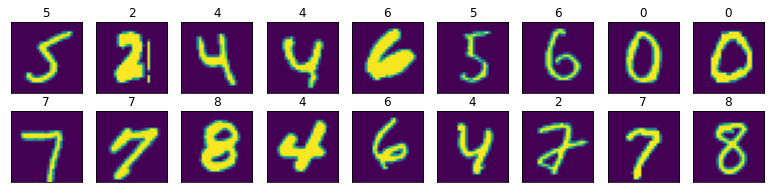

In [14]:
X, y = next(iter(test_loader))
show_images(X, 2, 9, titles=y)

In [15]:
batch_x = Variable(X)
batch_y = Variable(y)
output = cnn(batch_x)
_,pred=output.max(dim=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


In [19]:
get_accuracy(y_pred=pred,y_target=batch_y)

0.9443359375